## Setup

In [1]:
%run ../../shared_setup.ipynb

docker image cggh/biipy:v1.6.0


In [2]:
def tabulate(f):
    class Tabulated(etl.Table):
        def __init__(self, *args, **kwargs):
            self.args = args
            self.kwargs = kwargs
        def __iter__(self):
            return f(*self.args, **self.kwargs)
    return Tabulated
        

In [3]:
@tabulate
def tabulate_core_windows(window_size):
    yield 'chrom', 'start', 'stop'
    for rec in tbl_regions_1b.eq('region_type', 'Core').records():
        for start in range(rec.region_start, rec.region_stop, window_size):
            yield rec.region_chrom, start, start + window_size - 1
    

In [4]:
import re
motif_jiang_a = 'TA[TA]GTTAGT[CG]AAG[TG]TAAGACC'
motif_jiang_b = 'GCA[TC][CA][TG]AG[GT]TGC'
motif_jiang_c = '[TG]GA[TA]GAAG[AG][TG]GA'
motif_jiang_d = '[TA]GT[TA]AGTAGT[CA]A'
motif_jiang_e = '[TG]G[AG]TGA[TA]GA[AT][AG][AC]'


@tabulate
def tabulate_motifs(motif):
    motif = motif.lower()
    yield 'chrom', 'start', 'stop', 'sequence'
    for chrom in sorted(fasta.keys()):
        seq = fasta[chrom][:].lower()
        matches = re.finditer(motif, seq)
        for match in matches:
            start, stop = match.span()
            match_seq = seq[start:stop]
            yield chrom, start, stop, match_seq
        


In [5]:
tabulate_motifs(motif_jiang_a)

0|chrom,1|start,2|stop,3|sequence
Pf3D7_01_v3,620248,620269,tatgttagtcaagttaagacc
Pf3D7_01_v3,620710,620731,tatgttagtcaagttaagacc
Pf3D7_01_v3,620731,620752,tatgttagtcaagttaagacc
Pf3D7_01_v3,621717,621738,tatgttagtgaagttaagacc
Pf3D7_01_v3,622221,622242,tatgttagtcaagttaagacc


In [6]:
tabulate_motifs(motif_jiang_b)

0|chrom,1|start,2|stop,3|sequence
Pf3D7_01_v3,617229,617241,gcacctagttgc
Pf3D7_02_v3,937954,937966,gcatataggtgc
Pf3D7_02_v3,945012,945024,gcacctaggtgc
Pf3D7_03_v3,1040520,1040532,gcacctagttgc
Pf3D7_03_v3,1040547,1040559,gcacctagttgc


In [7]:
tabulate_motifs(motif_jiang_c)

0|chrom,1|start,2|stop,3|sequence
Pf3D7_01_v3,242882,242894,tgaagaagagga
Pf3D7_01_v3,338162,338174,tgatgaagatga
Pf3D7_01_v3,338201,338213,tgatgaagatga
Pf3D7_01_v3,338213,338225,tgatgaagatga
Pf3D7_01_v3,338231,338243,tgatgaagatga


In [8]:
tabulate_motifs(motif_jiang_d)

0|chrom,1|start,2|stop,3|sequence
Pf3D7_01_v3,640054,640066,tgttagtagtca
Pf3D7_01_v3,640114,640126,tgttagtagtca
Pf3D7_01_v3,640138,640150,tgtaagtagtca
Pf3D7_01_v3,640174,640186,tgttagtagtca
Pf3D7_01_v3,640186,640198,tgttagtagtca


In [9]:
tabulate_motifs(motif_jiang_e)

0|chrom,1|start,2|stop,3|sequence
Pf3D7_01_v3,33552,33564,ggatgaagataa
Pf3D7_01_v3,95362,95374,tgatgaagaaaa
Pf3D7_01_v3,98910,98922,tgatgatgaaga
Pf3D7_01_v3,101936,101948,tgatgaagaaaa
Pf3D7_01_v3,101981,101993,tgatgaagaaaa


In [10]:
tbl_co = (
    etl
    .frompickle(os.path.join(PUBLIC_DIR, 'tbl_co.pickle'))
    .convert('chrom', lambda v: str(v, 'ascii'))
)
display_with_nrows(tbl_co, caption='CO events')

0|sample,1|chrom,2|co_pos_mid,3|co_pos_min,4|co_pos_max,5|co_pos_range,6|cross,7|co_from_parent,8|co_to_parent
B1SD/PG0015-C/ERR019044,Pf3D7_01_v3,145052,144877,145227,350,hb3_dd2,hb3,dd2
GC03/PG0021-C/ERR015447,Pf3D7_01_v3,163584,163145,164024,879,hb3_dd2,dd2,hb3
XF12/PG0102-C/ERR029143,Pf3D7_01_v3,206769,205803,207736,1933,7g8_gb4,gb4,7g8
7C159/PG0040-Cx/ERR107475,Pf3D7_01_v3,206905,206074,207736,1662,hb3_dd2,hb3,dd2
CH3_61/PG0033-Cx/ERR175544,Pf3D7_01_v3,206905,206074,207736,1662,hb3_dd2,dd2,hb3


In [11]:
def tabulate_tr(chrom):
    fn = '/data/plasmodium/pfalciparum/pf-crosses/data/genome/sanger/version3/September_2012/%s.tr.pickle' % chrom
    tbl_tr = etl.frompickle(fn)
    return tbl_tr
    

tbl_tr = (
    etl
    .cat(*[tabulate_tr(chrom) for chrom in sorted(fasta.keys())])
    .sort(key=('chrom', 'start'))
)


def select_tr_threshold(row):
    unit_length = row.unit_length
    tract_length = row.tract_length
    return (
        ((unit_length == 1) and (tract_length >= 6)) or
        ((unit_length == 2) and (tract_length >= 9)) or
        ((unit_length == 3) and (tract_length >= 11)) or
        ((unit_length == 4) and (tract_length >= 13)) or
        ((unit_length == 5) and (tract_length >= 14)) or
        ((unit_length == 6) and (tract_length >= 16)) or
        ((unit_length >= 7) and (tract_length >= 18))
    )


tbl_tr_proper = tbl_tr.select(select_tr_threshold).cache()
tbl_tr_proper.display()

is_tr = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_tr[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_tr_proper.eq('chrom', chrom).records():
        start = rec.start - 1
        stop = rec.stop
        is_tr[chrom][start:stop] = True
is_tr

0|chrom,1|start,2|stop,3|repeat_unit,4|n_units,5|unit_length,6|last_unit_length,7|tract_length,8|region_type
Pf3D7_01_v3,13,37,cctaaac,3,7,3,24,SubtelomericRepeat
Pf3D7_01_v3,24,65,aaccctaaaccctg,2,14,13,41,SubtelomericRepeat
Pf3D7_01_v3,38,107,aaccctaaaccctgaacccta,3,21,6,69,SubtelomericRepeat
Pf3D7_01_v3,52,72,aacccta,2,7,6,20,SubtelomericRepeat
Pf3D7_01_v3,73,93,aacccta,2,7,6,20,SubtelomericRepeat


2016-03-15 10:23:48.973313 :: Pf3D7_01_v3
2016-03-15 10:29:32.155088 :: Pf3D7_02_v3
2016-03-15 10:29:32.446752 :: Pf3D7_03_v3
2016-03-15 10:29:32.800177 :: Pf3D7_04_v3
2016-03-15 10:29:33.145088 :: Pf3D7_05_v3
2016-03-15 10:29:33.516784 :: Pf3D7_06_v3
2016-03-15 10:29:33.868503 :: Pf3D7_07_v3
2016-03-15 10:29:34.233496 :: Pf3D7_08_v3
2016-03-15 10:29:34.621624 :: Pf3D7_09_v3
2016-03-15 10:29:35.005701 :: Pf3D7_10_v3
2016-03-15 10:29:35.449407 :: Pf3D7_11_v3
2016-03-15 10:29:35.907885 :: Pf3D7_12_v3
2016-03-15 10:29:36.415968 :: Pf3D7_13_v3
2016-03-15 10:29:37.041578 :: Pf3D7_14_v3


{'Pf3D7_01_v3': array([False, False, False, ...,  True,  True,  True], dtype=bool),
 'Pf3D7_02_v3': array([ True,  True,  True, ..., False, False, False], dtype=bool),
 'Pf3D7_03_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_04_v3': array([False, False, False, ...,  True,  True,  True], dtype=bool),
 'Pf3D7_05_v3': array([ True,  True,  True, ..., False, False, False], dtype=bool),
 'Pf3D7_06_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_07_v3': array([False, False, False, ...,  True,  True, False], dtype=bool),
 'Pf3D7_08_v3': array([False, False,  True, ...,  True,  True,  True], dtype=bool),
 'Pf3D7_09_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_10_v3': array([ True,  True,  True, ..., False, False, False], dtype=bool),
 'Pf3D7_11_v3': array([False, False, False, ..., False, False, False], dtype=bool),
 'Pf3D7_12_v3': array([False, False, False, ..., False, False, False], dtype

In [12]:
is_exon = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_exon[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_exons.eq('feature_chrom', chrom).records():
        start = rec.feature_start - 1
        stop = rec.feature_stop
        is_exon[chrom][start:stop] = True


2016-03-15 10:29:37.700494 :: Pf3D7_01_v3
2016-03-15 10:29:37.767273 :: Pf3D7_02_v3
2016-03-15 10:29:37.834538 :: Pf3D7_03_v3
2016-03-15 10:29:37.899519 :: Pf3D7_04_v3
2016-03-15 10:29:37.968023 :: Pf3D7_05_v3
2016-03-15 10:29:38.036432 :: Pf3D7_06_v3
2016-03-15 10:29:38.104313 :: Pf3D7_07_v3
2016-03-15 10:29:38.173077 :: Pf3D7_08_v3
2016-03-15 10:29:38.240904 :: Pf3D7_09_v3
2016-03-15 10:29:38.313166 :: Pf3D7_10_v3
2016-03-15 10:29:38.391950 :: Pf3D7_11_v3
2016-03-15 10:29:38.465714 :: Pf3D7_12_v3
2016-03-15 10:29:38.542520 :: Pf3D7_13_v3
2016-03-15 10:29:38.644136 :: Pf3D7_14_v3


In [13]:
%%R
library(AER)

/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: car

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lmtest

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: zoo

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: 'zoo'


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjec

In [14]:
callsets = load_callsets(COMBINED_CALLSET_FN_TEMPLATE, 
                         variant_filter='FILTER_PASS',
                         call_filter=combined_conf_calls, 
                         sample_exclusions=excessive_recomb_samples)

2016-03-15 10:29:40.400196 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/3d7_hb3.combined.final.npz
2016-03-15 10:29:40.683172 :: filter variants: excluding 157 (0.4%) retaining 42087 (99.6%) of 42244 variants
2016-03-15 10:29:40.724450 :: filter calls: excluding 2439 (0.3%) retaining 881388 (99.7%) of 883827 calls
2016-03-15 10:29:40.725696 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/hb3_dd2.combined.final.npz
2016-03-15 10:29:41.087023 :: filter variants: excluding 450 (1.2%) retaining 36461 (98.8%) of 36911 variants
2016-03-15 10:29:41.106950 :: filter samples: excluding ['SC01/PG0025-C/ERR019045'] including ['HB3/PG0004-CW/ERR012788', 'DD2/PG0008-CW/ERR012840', '1BB5/PG0023-C/ERR015449', '3BA6/PG0022-Cx/ERR126027', '3BD5/PG0024-C/ERR019053', '7C101/PG0074-C/ERR019048', '7C111/PG0038-C/ERR015457', '7C12/PG0035-Cx/ERR037704', '7C126/PG0047-C/ERR015452', '7C140/PG0039-C/ERR015454', '7C159/PG0040-Cx/ERR107475', '7C16/PG0036-C/ERR015

In [15]:
pos = dict()
for cross in CROSSES:
    variants = callsets[cross]['variants']
    pos[cross] = allel.SortedMultiIndex(variants['CHROM'], variants['POS'])

In [16]:
is_snp = dict()
for cross in CROSSES:
    variants = callsets[cross]['variants']
    is_snp[cross] = variants['is_snp']

In [27]:
def distance_to_centromere(row):
    cen_id = 'PF3D7_CEN' + row.chrom[6:8]
    try:
        cen = lkp_feature[cen_id]
        cen_pos = (cen['feature_start'] + cen['feature_stop'])/2
        window_pos = (row.start + row.stop) / 2
        return abs(window_pos - cen_pos)
    except KeyError:
        return None
    
    
def distance_to_telomere(row):
    chrom = row.chrom
    chrlen = len(fasta[chrom])
    l = row.start
    r = chrlen - row.stop
    return min(l, r)


def distance_to_core_edge(row):
    chrom = row.chrom
    core_start = tbl_regions_1b.eq('region_chrom', chrom).eq('region_type', 'Core').values('region_start').min()
    core_stop = tbl_regions_1b.eq('region_chrom', chrom).eq('region_type', 'Core').values('region_stop').max()
    l = row.start - core_start
    r = core_stop - row.stop
    return min(l, r)


def n_coding(row):
    return np.count_nonzero(is_exon[row.chrom][row.start-1:row.stop])


def n_tr(row):
    return np.count_nonzero(is_tr[row.chrom][row.start-1:row.stop])


def gc(row):
    seq = fasta[row.chrom][row.start-1:row.stop].lower()
    com = collections.Counter(seq)
    return (com['g'] + com['c']) / len(seq) 


def n_variants(row):
    nv = ni = ns = 0
    start = row.start
    stop = row.stop
    chrom = row.chrom.encode('ascii')
    for cross in CROSSES:
        try:
            loc = pos[cross].locate_range(chrom, start, stop)
        except KeyError:
            pass
        else:
            x = is_snp[cross][loc]
            ns += nnz(x)
            ni += nnz(~x)
    return ns, ni
    
    
@functools.lru_cache(maxsize=None)
def distance_to_motif(motif, vmax=None):
    tbl_motif = tabulate_motifs(motif)
    lkp_motif = tbl_motif.recordlookup('chrom')
    def _addfield(row):
        chrom = row.chrom
        window_mid = (row.start + row.stop) / 2
        try:
            motifs = lkp_motif[chrom]
        except KeyError:
            if vmax is None:
                return 4000000
            else:
                return vmax
        else:
            motif_mids = [(motif.start + motif.stop) / 2 for motif in motifs]
            nearest = min([abs(window_mid - motif_mid) for motif_mid in motif_mids])
            if vmax is None:
                return nearest
            else:
                return min(nearest, vmax)
    return _addfield    
    

In [28]:
@functools.lru_cache(maxsize=None)
def tabulate_co_predictors(window_size, vmax_motif=None):
    fn = os.path.join(CACHE_DIR, 'tbl_co_predictors.%s.%s.pickle' % (window_size, vmax_motif))
    if not os.path.exists(fn):
        log('building')
    
        # tabulate windows
        tbl_windows = tabulate_core_windows(window_size)

        # count COs in windows
        tbl_windows_co = (
            tbl_windows
            .intervalleftjoin(tbl_co, lkey='chrom', lstart='start', lstop='stop',
                              rkey='chrom', rstart='co_pos_min', rstop='co_pos_max',
                              include_stop=True)
            .cutout(4)
            .aggregate(key=('chrom', 'start', 'stop'),
                       aggregation=lambda vals: sum(1 for v in vals if v is not None),
                       value='cross')
            .rename('value', 'co_count')

        )

        # augment
        tbl_aug = (
            tbl_windows_co
            .addfield('cen_dist', distance_to_centromere)
            .addfield('tel_dist', distance_to_telomere)
            .notnone('cen_dist')
            .addfield('n_coding', n_coding)
            .addfield('gc', gc)
            .addfield('n_variants', n_variants)
            .unpack('n_variants', ('n_snps', 'n_indels'))
            .addfield('motif_jiang_a_dist', distance_to_motif(motif_jiang_a, vmax=vmax_motif))
            .addfield('motif_jiang_b_dist', distance_to_motif(motif_jiang_b, vmax=vmax_motif))
            .addfield('motif_jiang_c_dist', distance_to_motif(motif_jiang_c, vmax=vmax_motif))
            .addfield('motif_jiang_d_dist', distance_to_motif(motif_jiang_d, vmax=vmax_motif))
            .addfield('motif_jiang_e_dist', distance_to_motif(motif_jiang_e, vmax=vmax_motif))
            .addfield('motif_aat_dist', distance_to_motif('AA[TC]AA[TC]AA[TC]AA[TC]', vmax=vmax_motif))
            .addfield('motif_tta_dist', distance_to_motif('TT[AG]TT[AG]TT[AG]TT[AG]', vmax=vmax_motif))
            .addfield('motif_at_dist', distance_to_motif('ATATATATATAT', vmax=vmax_motif))
            .addfield('motif_a_dist', distance_to_motif('AAAAAAAAAAAA', vmax=vmax_motif))
            .addfield('motif_t_dist', distance_to_motif('TTTTTTTTTTTT', vmax=vmax_motif))
        )
        tbl_aug.progress(1000).topickle(fn)

    tbl_aug = (etl
        .frompickle(fn)
        # hack in extra field to avoid completely regenerating
        .addfield('n_tr', n_tr)
        .addfield('core_edge_dist', distance_to_core_edge)
    )
    # convert to dataframe
    df = tbl_aug.todataframe()
    
    return df

## Exploratory analysis

In [31]:
df = tabulate_co_predictors(5000, vmax_motif=None)
df.head()

,chrom,start,stop,co_count,cen_dist,tel_dist,n_coding,gc,n_snps,n_indels,...,motif_jiang_c_dist,motif_jiang_d_dist,motif_jiang_e_dist,motif_aat_dist,motif_tta_dist,motif_at_dist,motif_a_dist,motif_t_dist,n_tr,core_edge_dist
0,Pf3D7_01_v3,92901,97900,0,363720.5,92901,0,0.1644,29,13,...,147487.5,544659.5,32.5,961.5,3004.5,389.5,651.5,921.5,849,0
1,Pf3D7_01_v3,97901,102900,0,358720.5,97901,3258,0.2336,8,5,...,142487.5,539659.5,1484.5,2297.5,1851.5,1760.5,1658.5,1195.5,1115,5000
2,Pf3D7_01_v3,102901,107900,0,353720.5,102901,354,0.1518,8,20,...,137487.5,534659.5,3158.5,3098.5,2453.5,93.5,525.5,495.5,1164,10000
3,Pf3D7_01_v3,107901,112900,0,348720.5,107901,1805,0.2098,7,18,...,132487.5,529659.5,8158.5,325.5,501.5,122.5,191.5,530.5,959,15000
4,Pf3D7_01_v3,112901,117900,0,343720.5,112901,2899,0.2128,7,14,...,127487.5,524659.5,13158.5,5325.5,243.5,1539.5,463.5,1462.5,790,20000


In [45]:
df.columns

Index(['chrom', 'start', 'stop', 'co_count', 'cen_dist', 'tel_dist',
       'n_coding', 'gc', 'n_snps', 'n_indels', 'motif_jiang_a_dist',
       'motif_jiang_b_dist', 'motif_jiang_c_dist', 'motif_jiang_d_dist',
       'motif_jiang_e_dist', 'motif_aat_dist', 'motif_tta_dist',
       'motif_at_dist', 'motif_a_dist', 'motif_t_dist', 'n_tr',
       'core_edge_dist'],
      dtype='object')

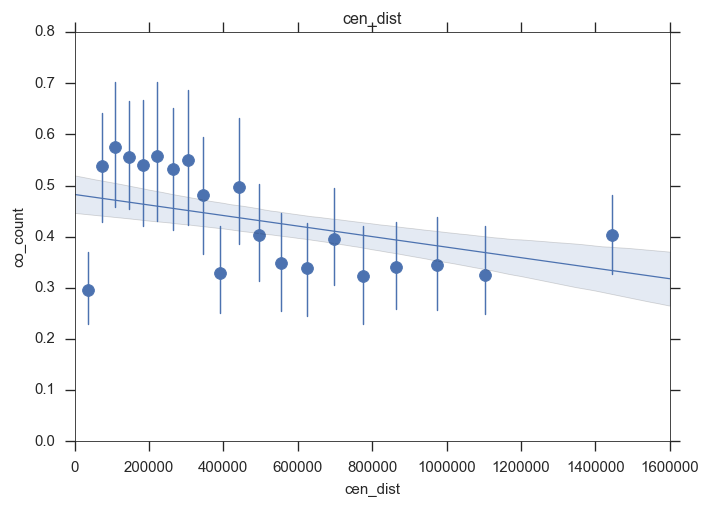

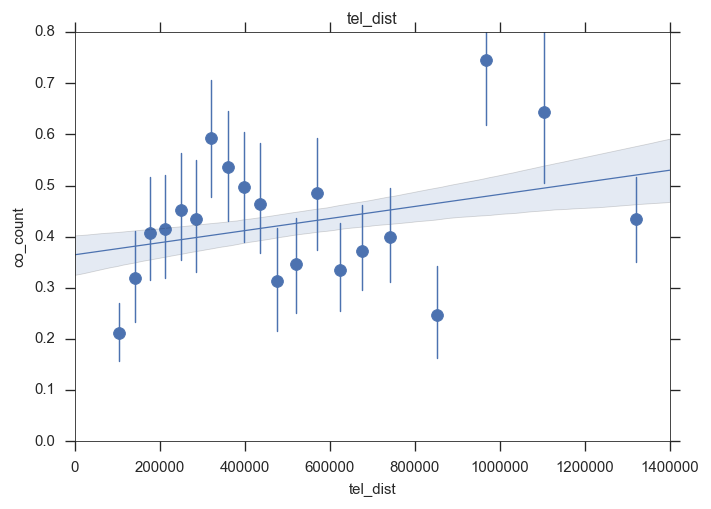

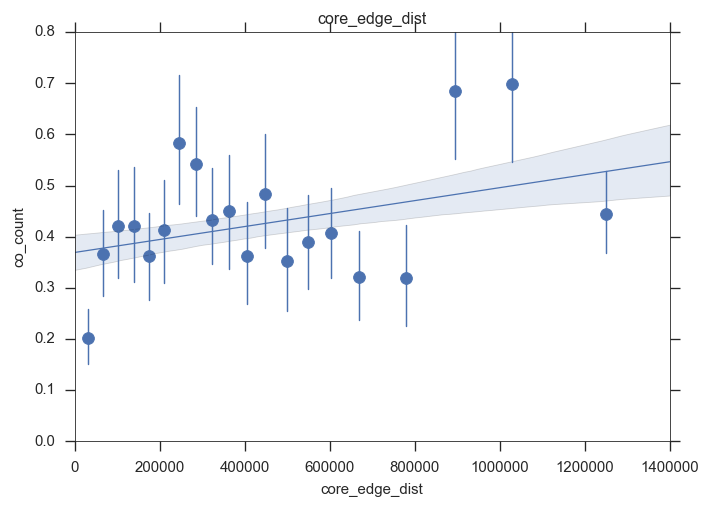

In [32]:
for v in ('cen_dist',
          'tel_dist',
          'core_edge_dist'):
    sns.regplot(v, 'co_count', data=df, x_bins=20)
    plt.title(v)
    plt.xlim(left=0)
    plt.ylim(0, 0.8)
    plt.show();

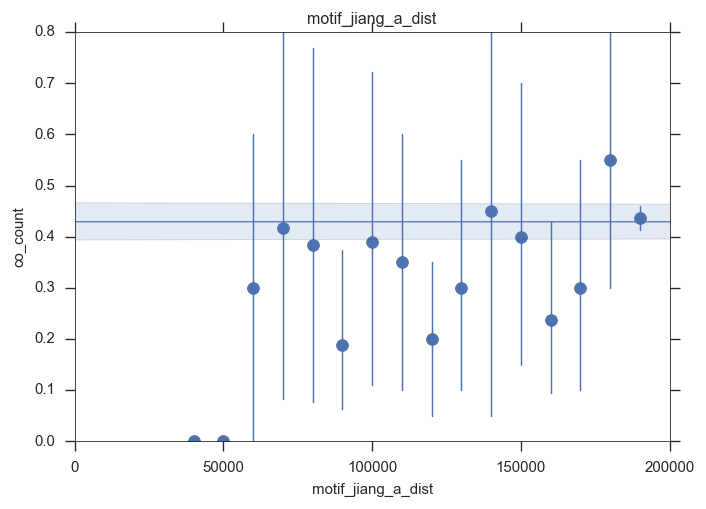

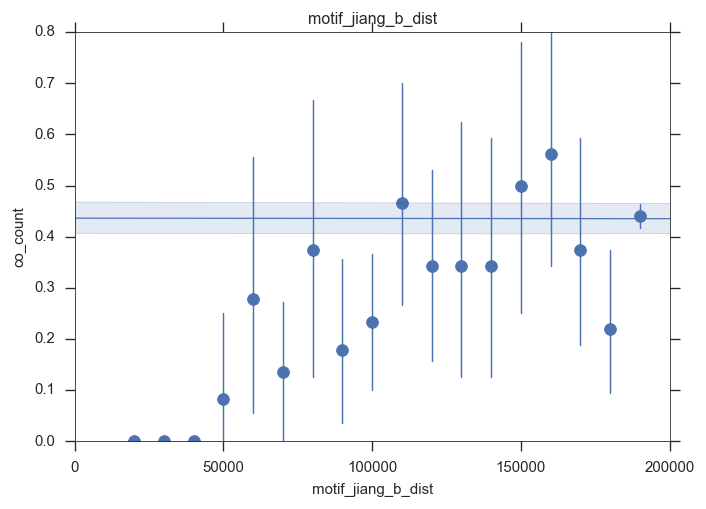

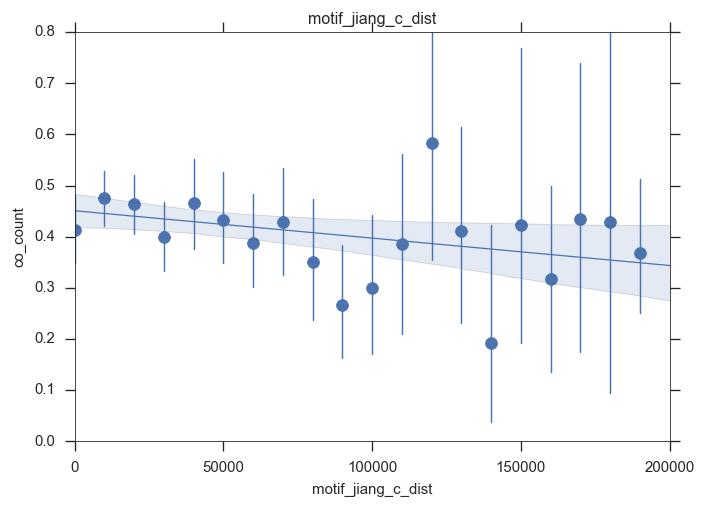

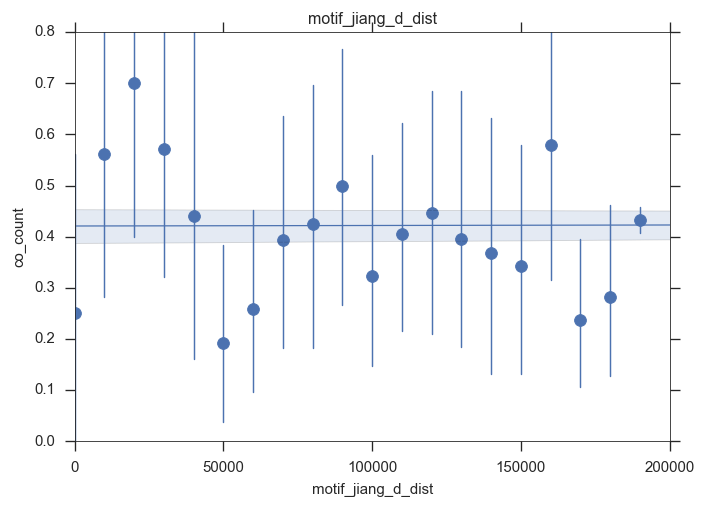

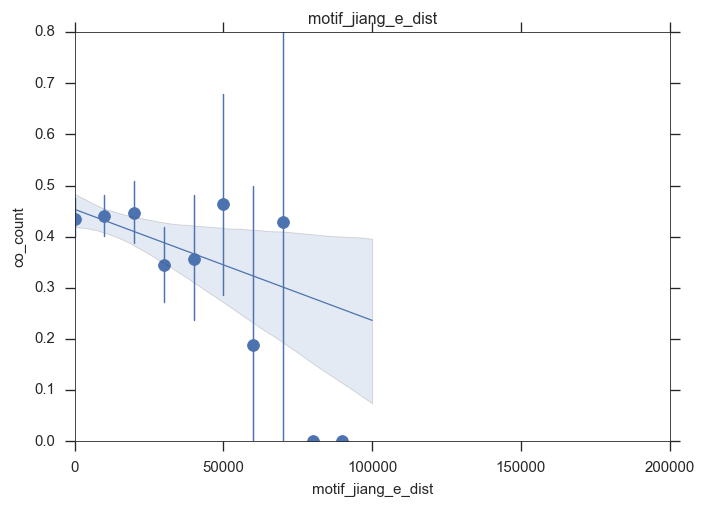

In [33]:
for v in ('motif_jiang_a_dist', 
          'motif_jiang_b_dist', 
          'motif_jiang_c_dist', 
          'motif_jiang_d_dist', 
          'motif_jiang_e_dist'):
    sns.regplot(v, 'co_count', data=df, x_bins=np.arange(0, 200000, 10000))
    plt.xlim(0, 200000)
    plt.ylim(0, 0.8)
    plt.title(v)
    plt.show();

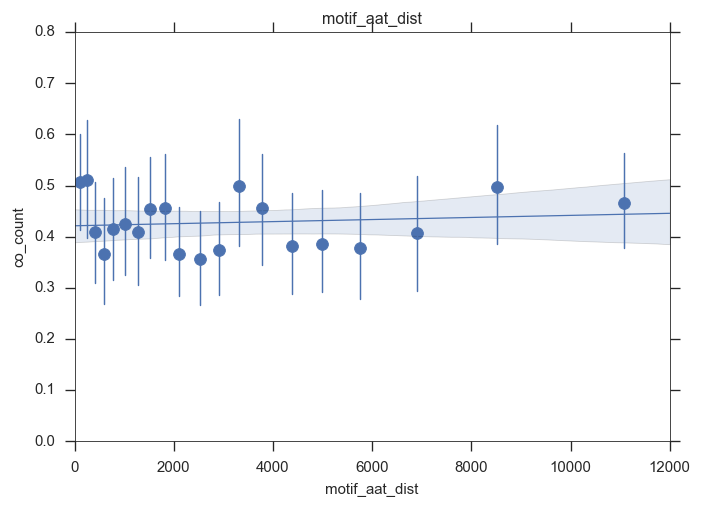

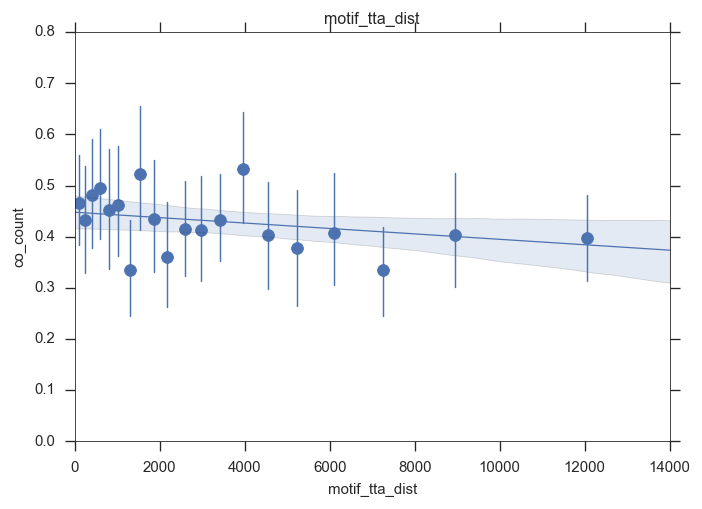

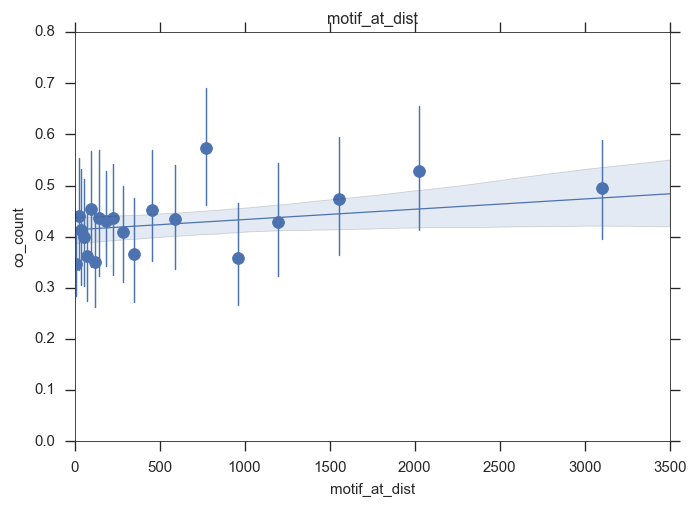

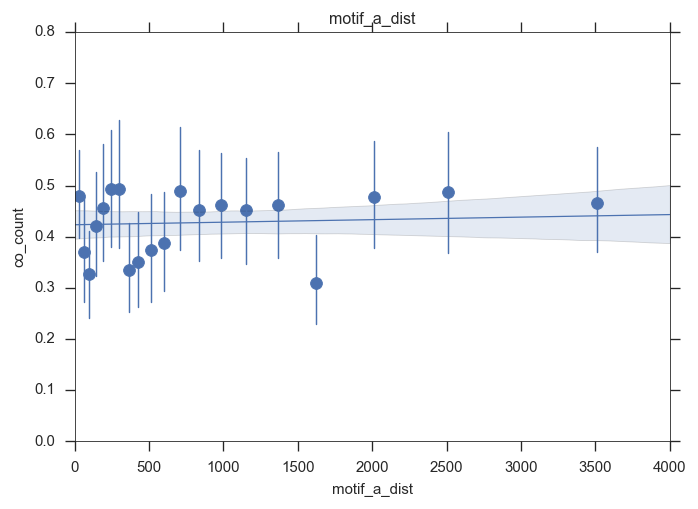

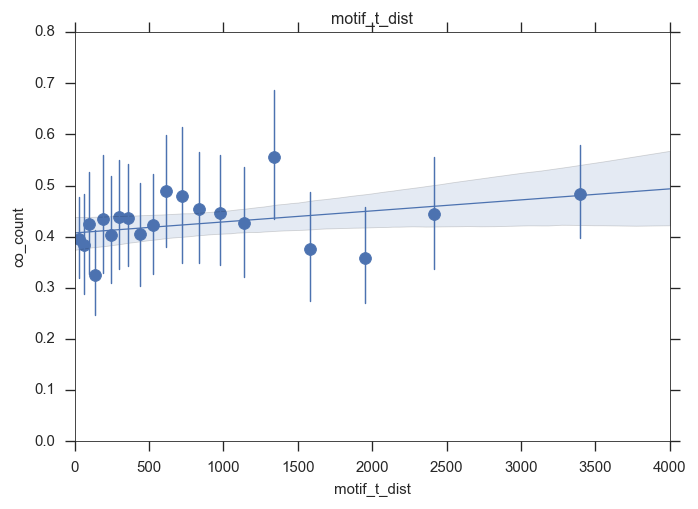

In [36]:
for v in ('motif_aat_dist', 
          'motif_tta_dist',
          'motif_at_dist',
          'motif_a_dist',
          'motif_t_dist',
         ):
    sns.regplot(v, 'co_count', data=df, x_bins=20)
    plt.title(v)
    plt.xlim(left=0)
    plt.ylim(0, .8)
    plt.show();

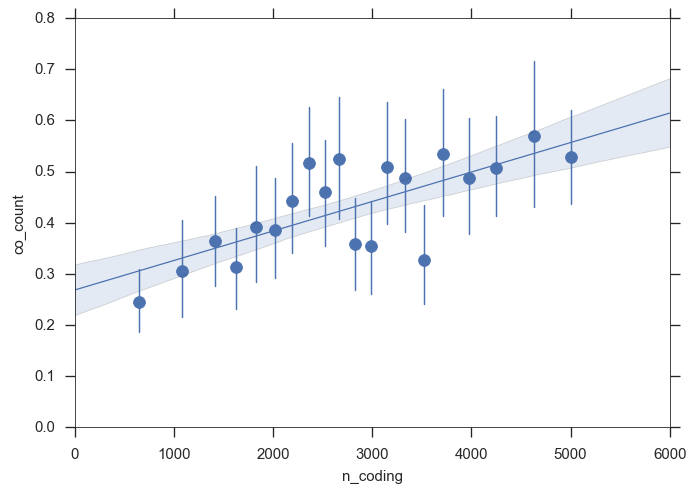

In [37]:
sns.regplot('n_coding', 'co_count', data=df, x_bins=20)
plt.xlim(left=0)
plt.ylim(0, .8);

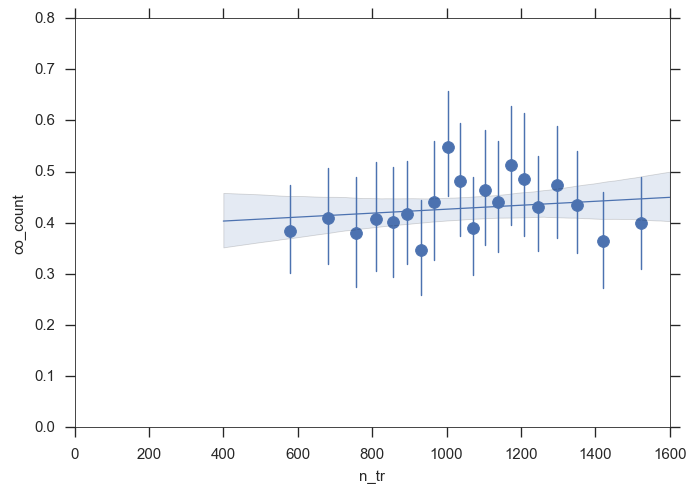

In [38]:
sns.regplot('n_tr', 'co_count', data=df, x_bins=20)
plt.xlim(left=0)
plt.ylim(0, .8);

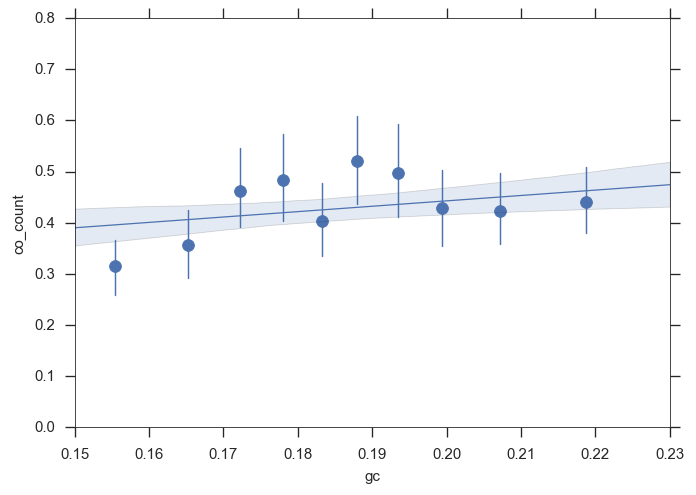

In [39]:
sns.regplot('gc', 'co_count', data=df, x_bins=10)
plt.ylim(0, .8);

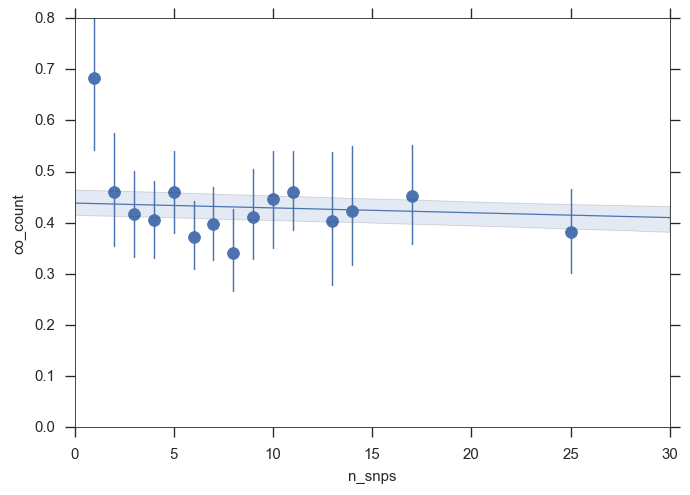

In [40]:
sns.regplot('n_snps', 'co_count', data=df, x_bins=20)
plt.xlim(left=0)
plt.ylim(0, .8);

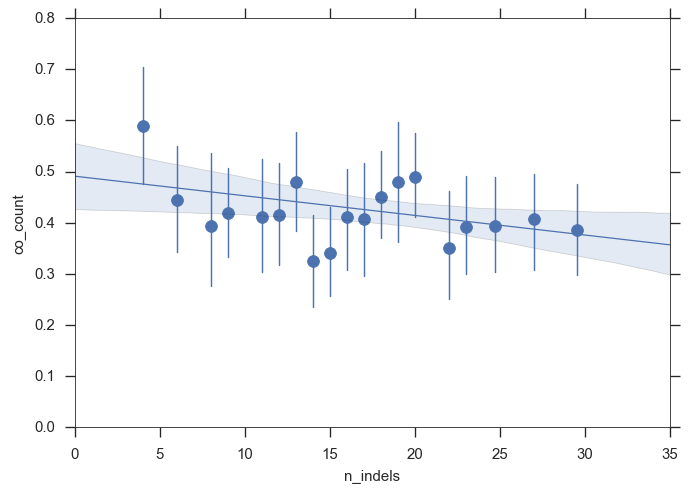

In [41]:
sns.regplot('n_indels', 'co_count', data=df, x_bins=20)
plt.ylim(0, .8);

## Modelling

In [81]:
@functools.lru_cache(maxsize=None)
def glm_poisson(window_size, vmax_motif=None, cen_threshold=100000):
    df = tabulate_co_predictors(window_size, vmax_motif=vmax_motif)
    df_cen = df[df.cen_dist <= cen_threshold].copy()
    df_tel = df[df.cen_dist > cen_threshold].copy()

#     # standardise predictors
#     for v in df.columns:
#         if v not in ('chrom', 'start', 'stop', 'co_count'):
#             a = df_cen[v].values
#             df_cen[v] = (a - a.mean()) / a.std(ddof=0)
#             a = df_tel[v].values
#             df_tel[v] = (a - a.mean()) / a.std(ddof=0)

    rd_cen = %R -i df_cen -o rd rd <- glm(co_count ~ cen_dist + tel_dist + n_coding + n_tr + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + motif_t_dist, data = df_cen, family = poisson)
    summ_cen = %R summary(rd)
    t_cen = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")

    rd_tel = %R -i df_tel -o rd rd <- glm(co_count ~ cen_dist + tel_dist + n_coding + n_tr + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + motif_t_dist, data = df_tel, family = poisson)
    summ_tel = %R summary(rd)
    t_tel = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")
    
    return summ_cen, t_cen, summ_tel, t_tel

In [94]:
@functools.lru_cache(maxsize=None)
def glm_poisson_v2(window_size, vmax_motif=None, cen_threshold=100000):
    df = tabulate_co_predictors(window_size, vmax_motif=vmax_motif).copy()
    
    # clip distances
    df['cen_dist'] = df.cen_dist.clip(upper=cen_threshold)
    df['core_edge_dist'] = df.core_edge_dist.clip(upper=cen_threshold)

    # standardise predictors
    for v in df.columns:
        if v not in ('chrom', 'start', 'stop', 'co_count'):
            a = df[v].values
            df[v] = (a - a.mean()) / a.std(ddof=0)
            
    rd = %R -i df -o rd rd <- glm(co_count ~ cen_dist + core_edge_dist + n_coding + n_tr + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + motif_t_dist, data = df, family = poisson)
    summ = %R summary(rd)
    t = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")

    return summ, t

In [95]:
@functools.lru_cache(maxsize=None)
def glm_poisson_v3(window_size, vmax_motif=None, cen_threshold=100000):
    df = tabulate_co_predictors(window_size, vmax_motif=vmax_motif)
    df_edge = df[(df.cen_dist <= cen_threshold) | (df.core_edge_dist <= cen_threshold)].copy()
    df_main = df[(df.cen_dist > cen_threshold) & (df.core_edge_dist > cen_threshold)].copy()
    
    # standardise predictors
    for v in df.columns:
        if v not in ('chrom', 'start', 'stop', 'co_count'):
            a = df_edge[v].values
            df_edge[v] = (a - a.mean()) / a.std(ddof=0)
            a = df_main[v].values
            df_main[v] = (a - a.mean()) / a.std(ddof=0)


    rd_edge = %R -i df_edge -o rd rd <- glm(co_count ~ cen_dist + core_edge_dist + n_coding + n_tr + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + motif_t_dist, data = df_edge, family = poisson)
    summ_edge = %R summary(rd)
    t_edge = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")

    rd_main = %R -i df_main -o rd rd <- glm(co_count ~ cen_dist + core_edge_dist + n_coding + n_tr + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + motif_t_dist, data = df_main, family = poisson)
    summ_main = %R summary(rd)
    t_main = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")
    
    return summ_edge, t_edge, summ_main, t_main

In [96]:
glm_results = dict()

vmax_motif = 100000
for window_size in 50000, 20000, 10000, 5000, 2000, 1000:
    summ_cen, t_cen, summ_tel, t_tel = glm_poisson(window_size, vmax_motif=vmax_motif)
    glm_results[window_size] = summ_cen, t_cen, summ_tel, t_tel
    print('========================================')
    print(window_size)
    print(summ_cen)
    print(t_cen)
    print(summ_tel)
    print(t_tel)

50000

Call:
glm(formula = co_count ~ cen_dist + tel_dist + n_coding + n_tr + 
    gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + 
    motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + 
    motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + 
    motif_t_dist, family = poisson, data = df_cen)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.15545  -0.99226  -0.02544   0.57703   1.89893  

Coefficients: (2 not defined because of singularities)
                     Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -1.233e+01  6.827e+00  -1.807  0.07084 . 
cen_dist           -1.169e-06  4.285e-06  -0.273  0.78490   
tel_dist            2.748e-08  3.072e-07   0.089  0.92873   
n_coding            2.711e-05  3.110e-05   0.872  0.38329   
n_tr                4.551e-05  1.447e-04   0.314  0.75319   
gc                  7.636e+00  1.283e+01   0.595  0.55183   
n_snps             -4.634e-04  4.103e-04  -1.129  0.2

In [97]:
glm_results_v2 = dict()

vmax_motif = 100000
for window_size in 50000, 20000, 10000, 5000, 2000, 1000:
    summ, t = glm_poisson_v2(window_size, vmax_motif=vmax_motif)
    glm_results_v2[window_size] = summ, t
    print('========================================')
    print(window_size)
    print(summ)
    print(t)


50000

Call:
glm(formula = co_count ~ cen_dist + core_edge_dist + n_coding + 
    n_tr + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + 
    motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + 
    motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + 
    motif_t_dist, family = poisson, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6448  -0.8773  -0.1451   0.5901   2.7139  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.9537963  0.0337909  28.226  < 2e-16 ***
cen_dist            0.0481926  0.0347353   1.387  0.16531    
core_edge_dist      0.0005682  0.0535129   0.011  0.99153    
n_coding            0.2935413  0.0468073   6.271 3.58e-10 ***
n_tr                0.2318742  0.0580502   3.994 6.49e-05 ***
gc                 -0.0267640  0.0443534  -0.603  0.54622    
n_snps              0.0157451  0.0325115   0.484  0.62818    
n_indels            0.1722385  0.

In [86]:
glm_results_v3 = dict()

vmax_motif = 100000
for window_size in 50000, 20000, 10000, 5000, 2000, 1000:
    summ_edge, t_edge, summ_main, t_main = glm_poisson_v3(window_size, vmax_motif=vmax_motif)
    glm_results_v3[window_size] = summ_edge, t_edge, summ_main, t_main
    print('========================================')
    print(window_size)
    print('==================== edge ====================')
    print(summ_edge)
    print(t_edge)
    print('==================== main ====================')
    print(summ_main)
    print(t_main)

/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Error in glm.fit(x = numeric(0), y = integer(0), weights = NULL, start = NULL,  : 
  object 'fit' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: In addition: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Warning messages:

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: 1: glm.fit: fitted rates numerically 0 occurred 

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: 2: glm.fit: fitted rates numerically 0 occurred 

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/pyt


Error in glm.fit(x = numeric(0), y = integer(0), weights = NULL, start = NULL,  : 
  object 'fit' not found
50000
==================== edge ====================

Call:
glm(formula = co_count ~ cen_dist + core_edge_dist + n_coding + 
    n_tr + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + 
    motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + 
    motif_aat_dist + motif_tta_dist + motif_at_dist + motif_a_dist + 
    motif_t_dist, family = poisson, data = df_edge)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1282  -0.8290  -0.1567   0.4204   2.3169  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.699145   0.073620   9.497  < 2e-16 ***
cen_dist            0.123472   0.075948   1.626  0.10400    
core_edge_dist      0.047892   0.066182   0.724  0.46929    
n_coding            0.303519   0.097856   3.102  0.00192 ** 
n_tr                0.258031   0.125048   2.063  0.03907 *  
gc

/usr/local/lib/python3.5/dist-packages/rpy2/robjects/functions.py:106: UserWarning: 2: glm.fit: algorithm did not converge 

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## Extra plots

In [98]:
tbl_co

0|sample,1|chrom,2|co_pos_mid,3|co_pos_min,4|co_pos_max,5|co_pos_range,6|cross,7|co_from_parent,8|co_to_parent
B1SD/PG0015-C/ERR019044,Pf3D7_01_v3,145052,144877,145227,350,hb3_dd2,hb3,dd2
GC03/PG0021-C/ERR015447,Pf3D7_01_v3,163584,163145,164024,879,hb3_dd2,dd2,hb3
XF12/PG0102-C/ERR029143,Pf3D7_01_v3,206769,205803,207736,1933,7g8_gb4,gb4,7g8
7C159/PG0040-Cx/ERR107475,Pf3D7_01_v3,206905,206074,207736,1662,hb3_dd2,hb3,dd2
CH3_61/PG0033-Cx/ERR175544,Pf3D7_01_v3,206905,206074,207736,1662,hb3_dd2,dd2,hb3


In [100]:
n_co = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    n_co[chrom] = np.zeros(len(fasta[chrom]), dtype='i4')
    for rec in tbl_co.eq('chrom', chrom).records():
        start = rec.co_pos_min - 1
        stop = rec.co_pos_max
        n_co[chrom][start:stop] = n_co[chrom][start:stop] + 1

n_co

2016-03-15 11:44:35.006675 :: Pf3D7_01_v3
2016-03-15 11:44:35.028216 :: Pf3D7_02_v3
2016-03-15 11:44:35.051196 :: Pf3D7_03_v3
2016-03-15 11:44:35.073735 :: Pf3D7_04_v3
2016-03-15 11:44:35.095973 :: Pf3D7_05_v3
2016-03-15 11:44:35.120908 :: Pf3D7_06_v3
2016-03-15 11:44:35.143683 :: Pf3D7_07_v3
2016-03-15 11:44:35.167533 :: Pf3D7_08_v3
2016-03-15 11:44:35.186177 :: Pf3D7_09_v3
2016-03-15 11:44:35.200679 :: Pf3D7_10_v3
2016-03-15 11:44:35.214952 :: Pf3D7_11_v3
2016-03-15 11:44:35.235677 :: Pf3D7_12_v3
2016-03-15 11:44:35.252268 :: Pf3D7_13_v3
2016-03-15 11:44:35.278449 :: Pf3D7_14_v3


{'Pf3D7_01_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_02_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_03_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_04_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_05_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_06_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_07_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_08_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_09_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_10_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_11_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_12_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_13_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'Pf3D7_14_v3': array([0, 0, 0, ..., 0, 0, 0], dtype=int32)}

In [101]:
is_core = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_core[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_regions_1b.eq('region_chrom', chrom).eq('region_type', 'Core').records():
        start = rec.region_start - 1
        stop = rec.region_stop
        is_core[chrom][start:stop] = True


2016-03-15 11:44:52.459005 :: Pf3D7_01_v3
2016-03-15 11:44:52.461700 :: Pf3D7_02_v3
2016-03-15 11:44:52.463765 :: Pf3D7_03_v3
2016-03-15 11:44:52.465871 :: Pf3D7_04_v3
2016-03-15 11:44:52.467982 :: Pf3D7_05_v3
2016-03-15 11:44:52.470132 :: Pf3D7_06_v3
2016-03-15 11:44:52.472345 :: Pf3D7_07_v3
2016-03-15 11:44:52.474382 :: Pf3D7_08_v3
2016-03-15 11:44:52.476216 :: Pf3D7_09_v3
2016-03-15 11:44:52.478277 :: Pf3D7_10_v3
2016-03-15 11:44:52.480251 :: Pf3D7_11_v3
2016-03-15 11:44:52.481930 :: Pf3D7_12_v3
2016-03-15 11:44:52.483976 :: Pf3D7_13_v3
2016-03-15 11:44:52.486012 :: Pf3D7_14_v3


In [102]:
is_exon = dict()
for chrom in sorted(fasta.keys()):
    log(chrom)
    is_exon[chrom] = np.zeros(len(fasta[chrom]), dtype='b1')
    for rec in tbl_exons.eq('feature_chrom', chrom).records():
        start = rec.feature_start - 1
        stop = rec.feature_stop
        is_exon[chrom][start:stop] = True


2016-03-15 11:45:09.174195 :: Pf3D7_01_v3
2016-03-15 11:45:09.254450 :: Pf3D7_02_v3
2016-03-15 11:45:09.328169 :: Pf3D7_03_v3
2016-03-15 11:45:09.406301 :: Pf3D7_04_v3
2016-03-15 11:45:09.487373 :: Pf3D7_05_v3
2016-03-15 11:45:09.573311 :: Pf3D7_06_v3
2016-03-15 11:45:09.644841 :: Pf3D7_07_v3
2016-03-15 11:45:09.712922 :: Pf3D7_08_v3
2016-03-15 11:45:09.783390 :: Pf3D7_09_v3
2016-03-15 11:45:09.855530 :: Pf3D7_10_v3
2016-03-15 11:45:09.929839 :: Pf3D7_11_v3
2016-03-15 11:45:10.006652 :: Pf3D7_12_v3
2016-03-15 11:45:10.087393 :: Pf3D7_13_v3
2016-03-15 11:45:10.170985 :: Pf3D7_14_v3


In [104]:
coding_tr = list()
coding_nontr = list()
noncoding_tr = list()
noncoding_nontr = list()
for chrom in sorted(fasta.keys()):
    # coding tr
    c = is_core[chrom] & is_exon[chrom] & is_tr[chrom]
    x = n_co[chrom][c]
    coding_tr.append(x)
    # coding non-tr
    c = is_core[chrom] & is_exon[chrom] & ~is_tr[chrom]
    x = n_co[chrom][c]
    coding_nontr.append(x)
    # non-coding tr
    c = is_core[chrom] & ~is_exon[chrom] & is_tr[chrom]
    x = n_co[chrom][c]
    noncoding_tr.append(x)
    # non-coding non-tr
    c = is_core[chrom] & ~is_exon[chrom] & ~is_tr[chrom]
    x = n_co[chrom][c]
    noncoding_nontr.append(x)
    
coding_tr = np.concatenate(coding_tr)
coding_nontr = np.concatenate(coding_nontr)
noncoding_tr = np.concatenate(noncoding_tr)
noncoding_nontr = np.concatenate(noncoding_nontr)


In [107]:
for x in coding_tr, coding_nontr, noncoding_tr, noncoding_nontr:
    print(x.mean(), x.std())

0.166780142546 0.477043084051
0.168413758092 0.486159724882
0.106075666555 0.393877725344
0.100056326805 0.383056799382


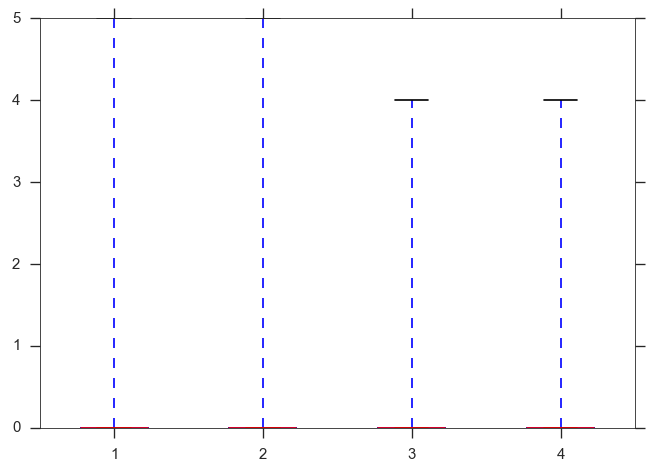

In [106]:
fig, ax = plt.subplots()
ax.boxplot([coding_tr, coding_nontr, noncoding_tr, noncoding_nontr]);

## Legacy

In [49]:
analyse_dispersion(1000)

2016-03-14 22:16:39.324392 :: =================================
2016-03-14 22:16:39.324850 :: 1000


0|co_count,1|count,2|frequency
0,17573,0.844774540909528
1,2584,0.1242188251129699
2,438,0.021055667724257283
3,192,0.009229881742140178
4,12,0.0005768676088837611
5,3,0.00014421690222094028


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,93900,0,365720.5,0,0.212,1,0,526858.0,523834.5,149487.5,546659.5,1967.5,1015.5,1004.5
Pf3D7_01_v3,93901,94900,0,364720.5,0,0.124,3,6,525858.0,522834.5,148487.5,545659.5,967.5,38.5,2004.5
Pf3D7_01_v3,94901,95900,0,363720.5,0,0.284,25,3,524858.0,521834.5,147487.5,544659.5,32.5,961.5,3004.5
Pf3D7_01_v3,95901,96900,0,362720.5,0,0.108,0,2,523858.0,520834.5,146487.5,543659.5,1032.5,662.5,2148.5
Pf3D7_01_v3,96901,97900,0,361720.5,0,0.094,0,2,522858.0,519834.5,145487.5,542659.5,1515.5,337.5,1148.5


2016-03-14 22:20:40.077024 :: ************************
2016-03-14 22:20:40.077556 :: model centromeric
2016-03-14 22:20:40.078163 :: 0.162679425837
2016-03-14 22:20:40.078484 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 22:20:40.218620 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1991  -0.6112  -0.4950  -0.3734   3.5918  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.380e+00  3.338e-01  -7.129 1.01e-12 ***
cen_dist            1.486e-05  1.866e-06   7.963 1.68e-15 ***
n_coding            1.078e-03  2.234e-04   4.824 1.41e-06 ***
gc                 -5.733e+00  1.824e+00  -3.143  0.00167 ** 
n_snps             -2.491e-02  1.821e-02  -1.368  0.17133  

In [50]:
analyse_dispersion(2000)

2016-03-14 22:20:41.624153 :: =================================
2016-03-14 22:20:41.627089 :: 2000


0|co_count,1|count,2|frequency
0,8351,0.8022864828513786
1,1618,0.15544240561052936
2,311,0.02987799020078778
3,117,0.011240272840810837
4,10,0.0009607070804111826
5,2,0.00019214141608223654


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,94900,0,365220.5,0,0.168,4,6,526358.0,523334.5,148987.5,546159.5,1467.5,538.5,1504.5
Pf3D7_01_v3,94901,96900,0,363220.5,0,0.196,25,5,524358.0,521334.5,146987.5,544159.5,532.5,1162.5,2648.5
Pf3D7_01_v3,96901,98900,0,361220.5,82,0.0995,2,4,522358.0,519334.5,144987.5,542159.5,1015.5,202.5,648.5
Pf3D7_01_v3,98901,100900,0,359220.5,1794,0.301,4,1,520358.0,517334.5,142987.5,540159.5,984.5,1797.5,1351.5
Pf3D7_01_v3,100901,102900,0,357220.5,1382,0.2305,2,2,518358.0,515334.5,140987.5,538159.5,41.5,3797.5,3351.5


2016-03-14 22:22:47.271834 :: ************************
2016-03-14 22:22:47.272334 :: model centromeric
2016-03-14 22:22:47.273014 :: 0.224620303757
2016-03-14 22:22:47.273436 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 22:22:47.364960 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3165  -0.6980  -0.5525  -0.3939   3.3306  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.814e+00  4.769e-01  -3.804 0.000143 ***
cen_dist            1.509e-05  2.277e-06   6.626 3.46e-11 ***
n_coding            6.938e-04  1.617e-04   4.291 1.78e-05 ***
gc                 -8.534e+00  2.755e+00  -3.098 0.001947 ** 
n_snps             -8.158e-03  1.027e-02  -0.794 0.427152  

In [51]:
analyse_dispersion(5000)

2016-03-14 22:22:47.925200 :: =================================
2016-03-14 22:22:47.926155 :: 5000


0|co_count,1|count,2|frequency
0,2869,0.687185628742515
1,935,0.22395209580838324
2,279,0.06682634730538922
3,77,0.01844311377245509
4,13,0.0031137724550898203
5,2,0.00047904191616766467


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,97900,0,363720.5,0,0.1644,29,13,524858.0,521834.5,147487.5,544659.5,32.5,961.5,3004.5
Pf3D7_01_v3,97901,102900,0,358720.5,3258,0.2336,8,5,519858.0,516834.5,142487.5,539659.5,1484.5,2297.5,1851.5
Pf3D7_01_v3,102901,107900,0,353720.5,354,0.1518,8,20,514858.0,511834.5,137487.5,534659.5,3158.5,3098.5,2453.5
Pf3D7_01_v3,107901,112900,0,348720.5,1805,0.2098,7,18,509858.0,506834.5,132487.5,529659.5,8158.5,325.5,501.5
Pf3D7_01_v3,112901,117900,0,343720.5,2899,0.2128,7,14,504858.0,501834.5,127487.5,524659.5,13158.5,5325.5,243.5


2016-03-14 22:23:42.795560 :: ************************
2016-03-14 22:23:42.796046 :: model centromeric
2016-03-14 22:23:42.796721 :: 0.417647058824
2016-03-14 22:23:42.797116 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 22:23:42.926625 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6177  -0.9010  -0.6698   0.4132   2.6366  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -1.174e+00  7.104e-01  -1.652  0.09845 .  
cen_dist            1.556e-05  2.667e-06   5.833 5.43e-09 ***
n_coding            3.179e-04  9.762e-05   3.257  0.00113 ** 
gc                 -9.728e+00  4.451e+00  -2.186  0.02885 *  
n_snps             -7.997e-03  7.547e-03  -1.060  0.28929  

In [52]:
analyse_dispersion(10000)

2016-03-14 22:23:43.208154 :: =================================
2016-03-14 22:23:43.209143 :: 10000


0|co_count,1|count,2|frequency
0,1122,0.5350500715307582
1,599,0.28564616118264186
2,260,0.12398664759179781
3,90,0.04291845493562232
4,24,0.011444921316165951
5,1,0.0004768717215069146
6,1,0.0004768717215069146


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,102900,0,361220.5,3258,0.199,37,18,522358.0,519334.5,144987.5,542159.5,1015.5,202.5,648.5
Pf3D7_01_v3,102901,112900,0,351220.5,2159,0.1808,15,38,512358.0,509334.5,134987.5,532159.5,5658.5,598.5,22.5
Pf3D7_01_v3,112901,122900,0,341220.5,4792,0.1984,12,27,502358.0,499334.5,124987.5,522159.5,15658.5,7825.5,72.5
Pf3D7_01_v3,122901,132900,0,331220.5,5004,0.1735,17,39,492358.0,489334.5,114987.5,512159.5,25658.5,721.5,190.5
Pf3D7_01_v3,132901,142900,0,321220.5,6522,0.192,22,41,482358.0,479334.5,104987.5,502159.5,26483.5,4061.5,382.5


2016-03-14 22:24:13.229841 :: ************************
2016-03-14 22:24:13.230290 :: model centromeric
2016-03-14 22:24:13.230792 :: 0.730769230769
2016-03-14 22:24:13.231066 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 22:24:13.262359 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1677  -1.0599  -0.7272   0.5481   2.6080  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         7.956e-02  9.702e-01   0.082  0.93465    
cen_dist            1.485e-05  2.930e-06   5.068 4.02e-07 ***
n_coding            1.784e-04  6.646e-05   2.685  0.00726 ** 
gc                 -1.363e+01  6.253e+00  -2.180  0.02924 *  
n_snps             -2.418e-03  2.513e-03  -0.962  0.33593  

In [53]:
analyse_dispersion(20000)

2016-03-14 22:24:13.538662 :: =================================
2016-03-14 22:24:13.539758 :: 20000


0|co_count,1|count,2|frequency
0,376,0.35471698113207545
1,301,0.2839622641509434
2,221,0.20849056603773586
3,102,0.09622641509433963
4,39,0.03679245283018868
5,13,0.012264150943396227
6,6,0.005660377358490566
7,2,0.0018867924528301887


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,112900,0,356220.5,5417,0.1899,52,56,517358.0,514334.5,139987.5,537159.5,658.5,4797.5,4351.5
Pf3D7_01_v3,112901,132900,0,336220.5,9796,0.18595,29,66,497358.0,494334.5,119987.5,517159.5,20658.5,5721.5,4362.5
Pf3D7_01_v3,132901,152900,1,316220.5,14142,0.20315,45,56,477358.0,474334.5,99987.5,497159.5,21483.5,938.5,1174.5
Pf3D7_01_v3,152901,172900,1,296220.5,12865,0.1888,62,91,457358.0,454334.5,79987.5,477159.5,1483.5,1443.5,8425.5
Pf3D7_01_v3,172901,192900,0,276220.5,8592,0.17105,128,116,437358.0,434334.5,59987.5,457159.5,8368.5,2046.5,6873.5


2016-03-14 22:24:30.988493 :: ************************
2016-03-14 22:24:30.988943 :: model centromeric
2016-03-14 22:24:30.989569 :: 1.31617647059
2016-03-14 22:24:30.989966 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 22:24:31.031628 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2946  -1.2042  -0.2185   0.6029   3.0070  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         2.368e-01  1.415e+00   0.167   0.8671    
cen_dist            1.408e-05  3.288e-06   4.284 1.84e-05 ***
n_coding            7.762e-05  4.507e-05   1.722   0.0851 .  
gc                 -1.065e+01  8.953e+00  -1.190   0.2340    
n_snps              4.401e-05  5.706e-04   0.077   0.9385   

In [54]:
analyse_dispersion(50000)

2016-03-14 22:24:31.225260 :: =================================
2016-03-14 22:24:31.227166 :: 50000


0|co_count,1|count,2|frequency
2,88,0.2018348623853211
3,73,0.16743119266055045
1,66,0.15137614678899083
4,66,0.15137614678899083
0,52,0.11926605504587157
5,51,0.11697247706422019
6,18,0.04128440366972477
8,10,0.022935779816513763
7,9,0.020642201834862386
9,2,0.0045871559633027525


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,142900,0,341220.5,21735,0.18874,103,163,502358.0,499334.5,124987.5,522159.5,15658.5,7825.5,72.5
Pf3D7_01_v3,142901,192900,2,291220.5,29077,0.1868,213,222,452358.0,449334.5,74987.5,472159.5,3516.5,679.5,5627.5
Pf3D7_01_v3,192901,242900,4,241220.5,30768,0.197,70,123,402358.0,399334.5,24987.5,422159.5,1031.5,1126.5,7902.5
Pf3D7_01_v3,242901,292900,1,191220.5,29821,0.19262,68,157,352358.0,349334.5,25012.5,372159.5,6721.5,6704.5,115.5
Pf3D7_01_v3,292901,342900,6,141220.5,28248,0.18416,64,201,302358.0,299334.5,20267.5,322159.5,4501.5,97.5,9210.5


2016-03-14 22:24:42.521326 :: ************************
2016-03-14 22:24:42.521749 :: model centromeric
2016-03-14 22:24:42.522194 :: 2.98305084746
2016-03-14 22:24:42.522492 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 22:24:42.551344 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6214  -0.7477  -0.1112   0.4943   1.7598  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -4.522e-01  2.077e+00  -0.218  0.82762   
cen_dist            3.460e-06  4.656e-06   0.743  0.45733   
n_coding            5.122e-05  2.631e-05   1.947  0.05154 . 
gc                 -8.482e+00  1.192e+01  -0.711  0.47682   
n_snps             -4.603e-04  3.781e-04  -1.217  0.22351   
n_in

In [55]:
analyse_dispersion(100000)

2016-03-14 22:24:42.647925 :: =================================
2016-03-14 22:24:42.648807 :: 100000


0|co_count,1|count,2|frequency
4,38,0.16593886462882096
6,30,0.13100436681222707
5,28,0.1222707423580786
7,25,0.1091703056768559
8,20,0.08733624454148471
3,19,0.08296943231441048
0,13,0.056768558951965066
2,13,0.056768558951965066
9,12,0.05240174672489083
10,11,0.048034934497816595


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,192900,2,316220.5,50812,0.18777,316,385,477358.0,474334.5,99987.5,497159.5,21483.5,938.5,1174.5
Pf3D7_01_v3,192901,292900,5,216220.5,60589,0.19481,138,280,377358.0,374334.5,12.5,397159.5,1877.5,1863.5,3602.5
Pf3D7_01_v3,292901,392900,8,116220.5,52005,0.1847,128,421,277358.0,274334.5,1636.5,297159.5,644.5,2.5,12024.5
Pf3D7_01_v3,392901,492900,6,16220.5,49583,0.18866,134,363,177358.0,174334.5,101636.5,197159.5,34139.5,1591.5,17129.5
Pf3D7_01_v3,460312,560311,3,51190.5,42915,0.20299,1403,486,109947.0,106923.5,35410.5,129748.5,11850.5,12980.5,8152.5


2016-03-14 22:24:50.827223 :: ************************
2016-03-14 22:24:50.827682 :: model centromeric
2016-03-14 22:24:50.828344 :: 6.2
2016-03-14 22:24:50.828748 :: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2016-03-14 22:24:50.849252 :: 
Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df_cen)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0129  -0.8436  -0.0854   0.7576   1.4049  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)   
(Intercept)         2.261e+00  2.912e+00   0.776  0.43745   
cen_dist            6.810e-06  6.002e-06   1.135  0.25655   
n_coding            7.483e-06  2.304e-05   0.325  0.74532   
gc                 -1.089e+01  1.567e+01  -0.695  0.48712   
n_snps             -6.747e-05  2.922e-04  -0.231  0.81740   
n_indels      

## Sandbox

In [17]:
df = tabulate_predictors(10000)
df.head()

0|co_count,1|count,2|frequency
0,1122,0.5350500715307582
1,599,0.28564616118264186
2,260,0.12398664759179781
3,90,0.04291845493562232
4,24,0.011444921316165951
5,1,0.0004768717215069146
6,1,0.0004768717215069146


0|chrom,1|start,2|stop,3|co_count,4|cen_dist,5|n_coding,6|gc,7|n_snps,8|n_indels,9|motif_jiang_a_dist,10|motif_jiang_b_dist,11|motif_jiang_c_dist,12|motif_jiang_d_dist,13|motif_jiang_e_dist,14|motif_aat_dist,15|motif_tta_dist
Pf3D7_01_v3,92901,102900,0,361220.5,3258,0.199,37,18,522358.0,519334.5,144987.5,542159.5,1015.5,202.5,648.5
Pf3D7_01_v3,102901,112900,0,351220.5,2159,0.1808,15,38,512358.0,509334.5,134987.5,532159.5,5658.5,598.5,22.5
Pf3D7_01_v3,112901,122900,0,341220.5,4792,0.1984,12,27,502358.0,499334.5,124987.5,522159.5,15658.5,7825.5,72.5
Pf3D7_01_v3,122901,132900,0,331220.5,5004,0.1735,17,39,492358.0,489334.5,114987.5,512159.5,25658.5,721.5,154.5
Pf3D7_01_v3,132901,142900,0,321220.5,6522,0.192,22,41,482358.0,479334.5,104987.5,502159.5,26483.5,4061.5,385.5


,chrom,start,stop,co_count,cen_dist,n_coding,gc,n_snps,n_indels,motif_jiang_a_dist,motif_jiang_b_dist,motif_jiang_c_dist,motif_jiang_d_dist,motif_jiang_e_dist,motif_aat_dist,motif_tta_dist
0,Pf3D7_01_v3,92901,102900,0,361220.5,3258,0.1990,37,18,522358,519334.5,144987.5,542159.5,1015.5,202.5,648.5
1,Pf3D7_01_v3,102901,112900,0,351220.5,2159,0.1808,15,38,512358,509334.5,134987.5,532159.5,5658.5,598.5,22.5
2,Pf3D7_01_v3,112901,122900,0,341220.5,4792,0.1984,12,27,502358,499334.5,124987.5,522159.5,15658.5,7825.5,72.5
3,Pf3D7_01_v3,122901,132900,0,331220.5,5004,0.1735,17,39,492358,489334.5,114987.5,512159.5,25658.5,721.5,154.5
4,Pf3D7_01_v3,132901,142900,0,321220.5,6522,0.1920,22,41,482358,479334.5,104987.5,502159.5,26483.5,4061.5,385.5


In [18]:
rd = %R -i df -o rd rd <- glm(co_count ~ cen_dist + n_coding + gc + n_snps + n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + motif_tta_dist, data = df, family = poisson)
rd

<ListVector - Python:0x7fef54ab5548 / R:0x3781450>
[Float..., Float..., Float..., ..., StrVe..., RNULL..., ListV...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fef54ad4b88 / R:0xadcd068>
[-0.445172, -0.000000, 0.000133, ..., -0.000005, 0.000006, -0.000012]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fef54a51c08 / R:0xd061b40>
[-1.000000, -1.000000, -1.000000, ..., -1.000000, -1.000000, -1.000000]
  fitted.values: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fef54a516c8 / R:0xd00e740>
[0.434281, 0.503580, 0.608735, ..., 0.323299, 0.546473, 0.296638]
  ...
  coefficients: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x7fef6222fd88 / R:0xc62ff18>
['glm.fit']
  residuals: <class 'rpy2.rinterface.RNULLType'>
  rpy2.rinterface.NULL
<ListVector - Python:0x7fef54ab5548 / R:0x3781450>
[Float..., Float..., Float..., ..., StrVe..., RNULL..., ListV...]

In [19]:
print(rd)


Call:  glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df)

Coefficients:
       (Intercept)            cen_dist            n_coding                  gc  
        -4.452e-01          -2.014e-07           1.327e-04          -3.763e+00  
            n_snps            n_indels  motif_jiang_a_dist  motif_jiang_b_dist  
        -2.843e-03           8.608e-03           2.069e-08          -1.517e-08  
motif_jiang_c_dist  motif_jiang_d_dist  motif_jiang_e_dist      motif_aat_dist  
        -3.033e-07           7.041e-09          -5.190e-06           5.576e-06  
    motif_tta_dist  
        -1.221e-05  

Degrees of Freedom: 1945 Total (i.e. Null);  1933 Residual
Null Deviance:	    2446 
Residual Deviance: 2363 	AIC: 4452



In [20]:
summ = %R summary(rd)
summ

<ListVector - Python:0x7fefcdf30708 / R:0x9e034f0>
[Vector, Formula, ListV..., ..., IntVe..., Matrix, Matrix]
  call: <class 'rpy2.robjects.vectors.Vector'>
  <Vector - Python:0x7fefcdf30048 / R:0xbd1e378>
[RNULLType, Vector, Vector, Vector]
  terms: <class 'rpy2.robjects.Formula'>
  <Formula - Python:0x7fefcdaca708 / R:0xb0385f8>
<ListVector - Python:0x7fefcdf30708 / R:0x9e034f0>
[Vector, Formula, ListV..., ..., IntVe..., Matrix, Matrix]
  ...
  call: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x7fef54f68308 / R:0xc9f9f68>
[      13,     1933,       13]
  terms: <class 'rpy2.robjects.vectors.Matrix'>
  <Matrix - Python:0x7fef60047d48 / R:0xc6e5920>
[0.132926, -0.000000, 0.000002, ..., 0.000000, 0.000000, 0.000000]
  family: <class 'rpy2.robjects.vectors.Matrix'>
  <Matrix - Python:0x7fef6004e4c8 / R:0xc90e8b0>
[0.132926, -0.000000, 0.000002, ..., 0.000000, 0.000000, 0.000000]

In [21]:
print(summ)


Call:
glm(formula = co_count ~ cen_dist + n_coding + gc + n_snps + 
    n_indels + motif_jiang_a_dist + motif_jiang_b_dist + motif_jiang_c_dist + 
    motif_jiang_d_dist + motif_jiang_e_dist + motif_aat_dist + 
    motif_tta_dist, family = poisson, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6206  -1.1827  -0.9273   0.4467   4.0896  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -4.452e-01  3.646e-01  -1.221  0.22208    
cen_dist           -2.014e-07  7.135e-08  -2.823  0.00476 ** 
n_coding            1.327e-04  2.076e-05   6.392 1.64e-10 ***
gc                 -3.763e+00  2.057e+00  -1.830  0.06728 .  
n_snps             -2.843e-03  1.389e-03  -2.046  0.04076 *  
n_indels            8.608e-03  2.674e-03   3.219  0.00128 ** 
motif_jiang_a_dist  2.069e-08  3.008e-08   0.688  0.49150    
motif_jiang_b_dist -1.517e-08  3.348e-08  -0.453  0.65041    
motif_jiang_c_dist -3.033e-07  6.728e-07  -0.451  0.

In [39]:
'%.2e' % .2

'2.00e-01'

In [24]:
print(summ.names)

 [1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"    



In [32]:
summ[11]

<Matrix - Python:0x7fef56903088 / R:0xa21a460>
[-0.445172, -0.000000, 0.000133, ..., 0.040299, 0.455869, 0.092008]

In [33]:
coefficients = np.array(summ[11])
coefficients

array([[ -4.45171660e-01,   3.64590289e-01,  -1.22101897e+00,
          2.22078837e-01],
       [ -2.01410741e-07,   7.13517168e-08,  -2.82278759e+00,
          4.76081019e-03],
       [  1.32670618e-04,   2.07570309e-05,   6.39159899e+00,
          1.64159948e-10],
       [ -3.76305116e+00,   2.05656092e+00,  -1.82977860e+00,
          6.72830521e-02],
       [ -2.84265750e-03,   1.38941791e-03,  -2.04593411e+00,
          4.07628536e-02],
       [  8.60779846e-03,   2.67376152e-03,   3.21935909e+00,
          1.28477485e-03],
       [  2.06931439e-08,   3.00802901e-08,   6.87930330e-01,
          4.91496655e-01],
       [ -1.51742544e-08,   3.34833169e-08,  -4.53188506e-01,
          6.50413008e-01],
       [ -3.03336612e-07,   6.72787409e-07,  -4.50865471e-01,
          6.52086511e-01],
       [  7.04123530e-09,   4.70625075e-08,   1.49614538e-01,
          8.81068738e-01],
       [ -5.19044121e-06,   2.53109058e-06,  -2.05067383e+00,
          4.02987212e-02],
       [  5.57608480e

In [54]:
from prettypandas import PrettyPandas

In [58]:
col_index = pandas.MultiIndex.from_product([[10000], ['Estimate', 'Std. Error', 'z value', 'Pr(>|z|)']], 
                                           names=['window size', 'coefficient'])
row_index = ['intercept', 'cen_dist', 'n_coding', 'gc', 'n_snps', 'n_indels', 
             'motif_jiang_a_dist', 'motif_jiang_b_dist', 'motif_jiang_c_dist', 'motif_jiang_d_dist', 'motif_jiang_e_dist',
             'motif_aat_dist', 'motif_tta_dist']
df = pandas.DataFrame(coefficients, columns=col_index, index=row_index)
df

window size                10000                                      
coefficient             Estimate    Std. Error   z value      Pr(>|z|)
intercept          -4.451717e-01  3.645903e-01 -1.221019  2.220788e-01
cen_dist           -2.014107e-07  7.135172e-08 -2.822788  4.760810e-03
n_coding            1.326706e-04  2.075703e-05  6.391599  1.641599e-10
gc                 -3.763051e+00  2.056561e+00 -1.829779  6.728305e-02
n_snps             -2.842657e-03  1.389418e-03 -2.045934  4.076285e-02
n_indels            8.607798e-03  2.673762e-03  3.219359  1.284775e-03
motif_jiang_a_dist  2.069314e-08  3.008029e-08  0.687930  4.914967e-01
motif_jiang_b_dist -1.517425e-08  3.348332e-08 -0.453189  6.504130e-01
motif_jiang_c_dist -3.033366e-07  6.727874e-07 -0.450865  6.520865e-01
motif_jiang_d_dist  7.041235e-09  4.706251e-08  0.149615  8.810687e-01
motif_jiang_e_dist -5.190441e-06  2.531091e-06 -2.050674  4.029872e-02
motif_aat_dist      5.576085e-06  7.477984e-06  0.745667  4.558687e-01
motif_tta_dist     -1.221094e-05  7.247289e-06 -1.684898  9.200823e-02

In [60]:
pandas.__version__

'0.17.1'

In [71]:
dfs = df.style
dfs.apply(lambda v: '%.1f' % v, axis=0)

TypeError: ("cannot convert the series to <class 'float'>", 'occurred at index (10000, Estimate)')

In [56]:
PrettyPandas(df, precision=2)

In [40]:
t = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")
t

<ListVector - Python:0x7fef61fa1588 / R:0xbdd4aa8>
[Float..., Float..., Float..., ..., StrVe..., StrVe..., StrVe...]
  statistic: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fef56893c48 / R:0xc0e74a8>
[4.871770]
  p.value: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fef568931c8 / R:0xca11b48>
[0.000001]
  estimate: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x7fef56893908 / R:0xc0e7418>
[0.192078]
  ...
  statistic: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x7fef54a90e88 / R:0xc4bc038>
['greater']
  p.value: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x7fef54a90288 / R:0xc4bc8b8>
['Overdispersion test']
  estimate: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x7fef568992c8 / R:0xca11e48>
['rd']

In [48]:
t[1][0]

5.530132768132743e-07

In [41]:
print(t)


	Overdispersion test

data:  rd
z = 4.8718, p-value = 5.53e-07
alternative hypothesis: true alpha is greater than 0
sample estimates:
    alpha 
0.1920779 




In [ ]:
        summ = %R summary(rd)
        log(summ)
        t = %R -i rd -o t t <- dispersiontest(rd, trafo=1, alternative="greater")


## Sandbox

In [36]:
x = scipy.stats.poisson.rvs(np.mean(co_count), size=co_count.size)
x

array([0, 0, 1, ..., 0, 1, 1])

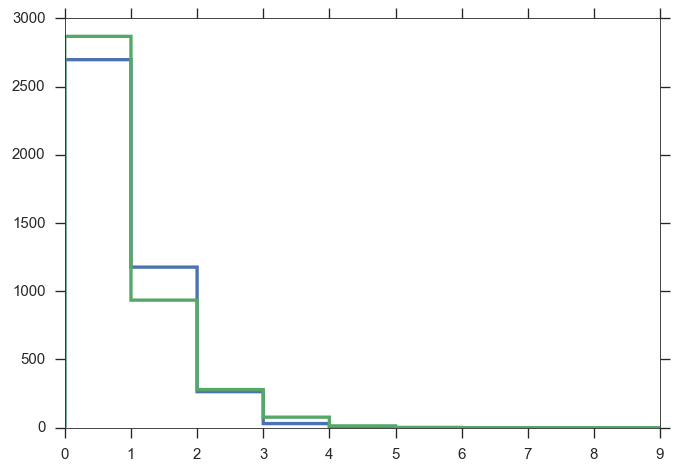

In [37]:
plt.hist(x, histtype='step', bins=np.arange(10), lw=2)
plt.hist(co_count, histtype='step', bins=np.arange(10), lw=2);

In [33]:
np.mean(co_count), np.std(co_count)

(0.42778443113772457, 0.73214916283762699)

In [35]:
np.mean(x), np.std(x)

(0.86347305389221551, 0.92110057064902273)

## Sandbox

In [14]:
%%R
library(AER)
data(RecreationDemand)
head(RecreationDemand)

  trips quality ski income userfee  costC   costS   costH
1     0       0 yes      4      no  67.59  68.620  76.800
2     0       0  no      9      no  68.86  70.936  84.780
3     0       0 yes      5      no  58.12  59.465  72.110
4     0       0  no      2      no  15.79  13.750  23.680
5     0       0 yes      3      no  24.02  34.033  34.547
6     0       0 yes      5      no 129.46 137.377 137.850


In [15]:
%%R
rd <- glm(RecreationDemand$trips ~ 1, family = poisson)
summary(rd)


Call:
glm(formula = RecreationDemand$trips ~ 1, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1186  -2.1186  -2.1186  -0.1662  21.7766  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.8084     0.0260   31.09   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 4849.7  on 658  degrees of freedom
Residual deviance: 4849.7  on 658  degrees of freedom
AIC: 5604.8

Number of Fisher Scoring iterations: 6



In [17]:
%%R
dispersiontest(rd, trafo=1, alternative="greater")


	Overdispersion test

data:  rd
z = 3.0234, p-value = 0.00125
alternative hypothesis: true alpha is greater than 0
sample estimates:
   alpha 
16.61573 



In [ ]:
combined = load_callsets(COMBINED_CALLSET_FN_TEMPLATE, 
                         variant_filter='FILTER_PASS',
                         call_filter=combined_conf_calls, 
                         sample_exclusions=excessive_recomb_samples)

In [ ]:
variants = combined['3d7_hb3']['variants']

In [ ]:
pos = variants['POS'][variants['CHROM'] == b'Pf3D7_01_v3']
pos.shape

In [ ]:
tbl_intervals = (
    etl
    .fromcolumns((pos[:-1], pos[1:], np.diff(pos)), header=('start', 'stop', 'length'))
    .addfield('chrom', b'Pf3D7_01_v3', index=0)
    .intervalleftjoin(tbl_recom.prefixheader('recom_'), 
                      lkey='chrom', lstart='start', lstop='stop',
                      rkey='recom_chrom', rstart='recom_start', rstop='recom_stop',
                      include_stop=True)
    .aggregate(key=('chrom', 'start', 'stop', 'length'),
               aggregation=list, value='recom_type')
    .rename('value', 'event_types')
    .convert('event_types', lambda v: [] if v == [None] else v)
    .addfield('n_events', lambda row: len(row.event_types))
)
tbl_intervals.gt('n_events', 0).display(50)